## Pontos esperados:
1) Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários.;
2) Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes;
3) Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados;
4) Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?
5) Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.
6) Que outras bases externas ou internas voce buscaria para enriquecer as análises?
7) Quais os pré-processamentos aplicados e o porquê.
8) Quais modelos escolhidos e o porquê da escolha desses modelos.
9) Quais outras melhorias poderiam ser feitas tanto nos dados quanto em relação à modelagem?
10) Quais métricas foram escolhidas e o porquê.

## [Hotel Booking Prediction](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

1. hotel :(H1 = Resort Hotel or H2 = City Hotel).

2. is_canceled Value: showing if the booking had been cancelled (1) or not (0).

3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

4. arrival_date_year: Year of arrival date.

5. arrival_date_month: The months in which guests are coming.

6. arrival_date_week_number: Week number of year for arrival date.

7. arrival_date_day_of_month: Which day of the months guest is arriving.

8. stays_in_weekend_nights: Number of weekend stay at night (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

9. stays_in_week_nights: Number of weekdays stay at night (Monday to Friday) in the hotel.

10. adults: Number of adults.

11. children: Number of children.

12. babies: Number of babies.

13. meal: Type of meal booked.

14. country: Country of origin.

15. market_segment: Through which channel hotels were booked.

16. distribution_channel: Booking distribution channel.

17. is_repeated_guest: The values indicating if the booking name was from a repeated guest (1) or not (0).

18. previous_cancellations: Show if the repeated guest has cancelled the booking before.

19. previous_bookings_not_canceled: Show if the repeated guest has not cancelled the booking before.

20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. assigned_room_type: Code for the type of room assigned to the booking. Code is presented instead of designation for anonymity reasons.

22. booking_changes: How many times did booking changes happen.

23. deposit_type: Indication on if the customer deposited something to confirm the booking.

24. agent: If the booking happens through agents or not.

25. company: If the booking happens through companies, the company ID that made the booking or responsible for paying the booking.

26. days_in_waiting_list: Number of days the booking was on the waiting list before the confirmation to the customer.

27. customer_type: Booking type like Transient – Transient-Party – Contract – Group.

28. adr: Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.

29. required_car_parking_spaces: How many parking areas are necessary for the customers.

30. total_of_special_requests: Total unique requests from consumers.

31. reservation_status: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out

32. reservation_status_date: The last status date.

---  
# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
col_cat = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
           'reserved_room_type', 'assigned_room_type', 'deposit_type', 
           'customer_type', 'reservation_status']

col_num = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'children', 'babies', 'is_repeated_guest', 'is_canceled',
           'previous_cancellations', 'previous_bookings_not_canceled',
           'booking_changes', 'days_in_waiting_list', 'adr', 
           'required_car_parking_spaces', 'total_of_special_requests']

# criar colunas ##############################################################
# cat = 'dt_season', 'dt_arrival_quarter', 'dt_arrival_week_month'
# num = 'stays_in_total', 'guest_total', 'previous_bookings_total', 'is_vacation_period', 'is_weekend'

# não usadas #################################################################
# 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 
# 'arrival_date_day_of_month', 'arrival_date_full', 'reservation_status_date'
# IDs = 'agent', 'company'


In [7]:
df.arrival_date_month = pd.Categorical(df.arrival_date_month, 
                      categories=['January', 'February', 'March', 'April', 'May', 'June',
                                  'July', 'August', 'September', 'October', 'November', 'December'],
                      ordered=True)

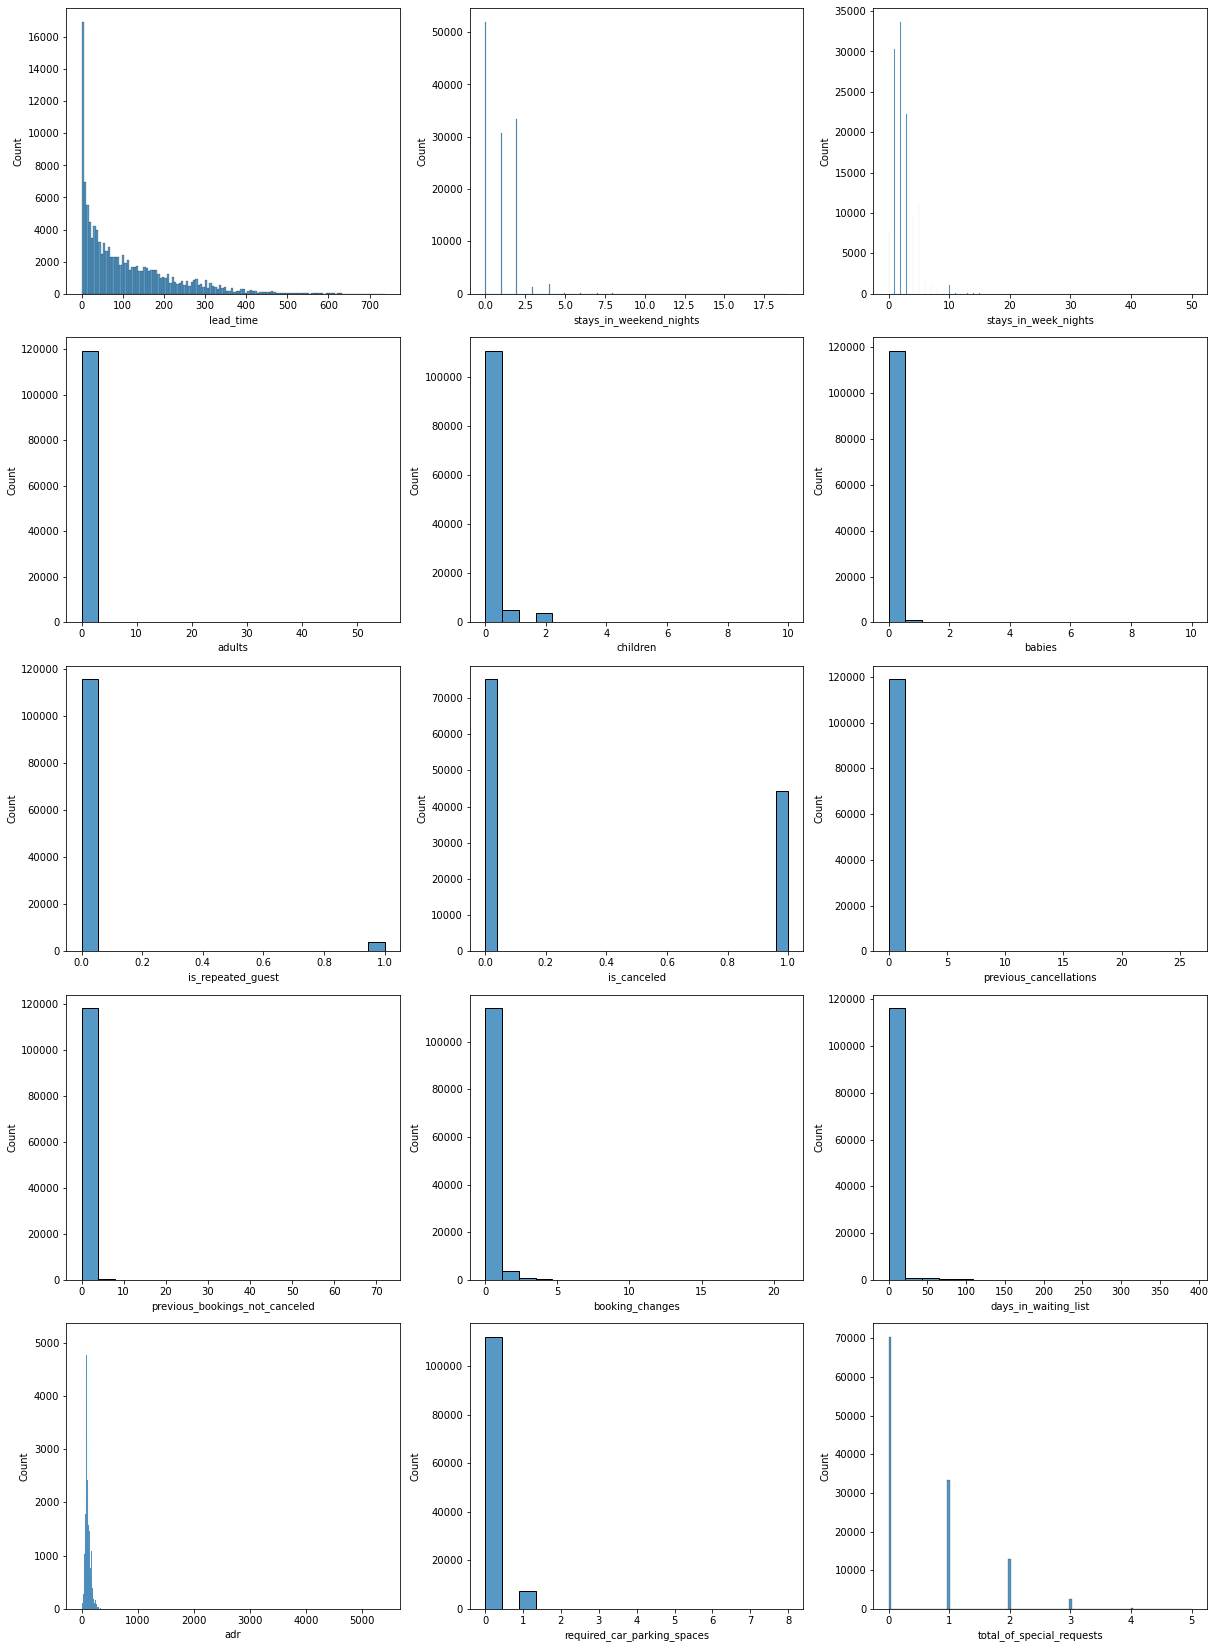

In [6]:
# Analisar variáveis numéricas
c = 3
l = -(- len(col_num) //c)

f, axes = plt.subplots(l, c, figsize=(17,23)) 
y=0
for name in col_num:
    i, j = divmod(y, c)
    sns.histplot(data=df, x=name, ax=axes[i, j])
    y+=1

plt.tight_layout()
plt.show()

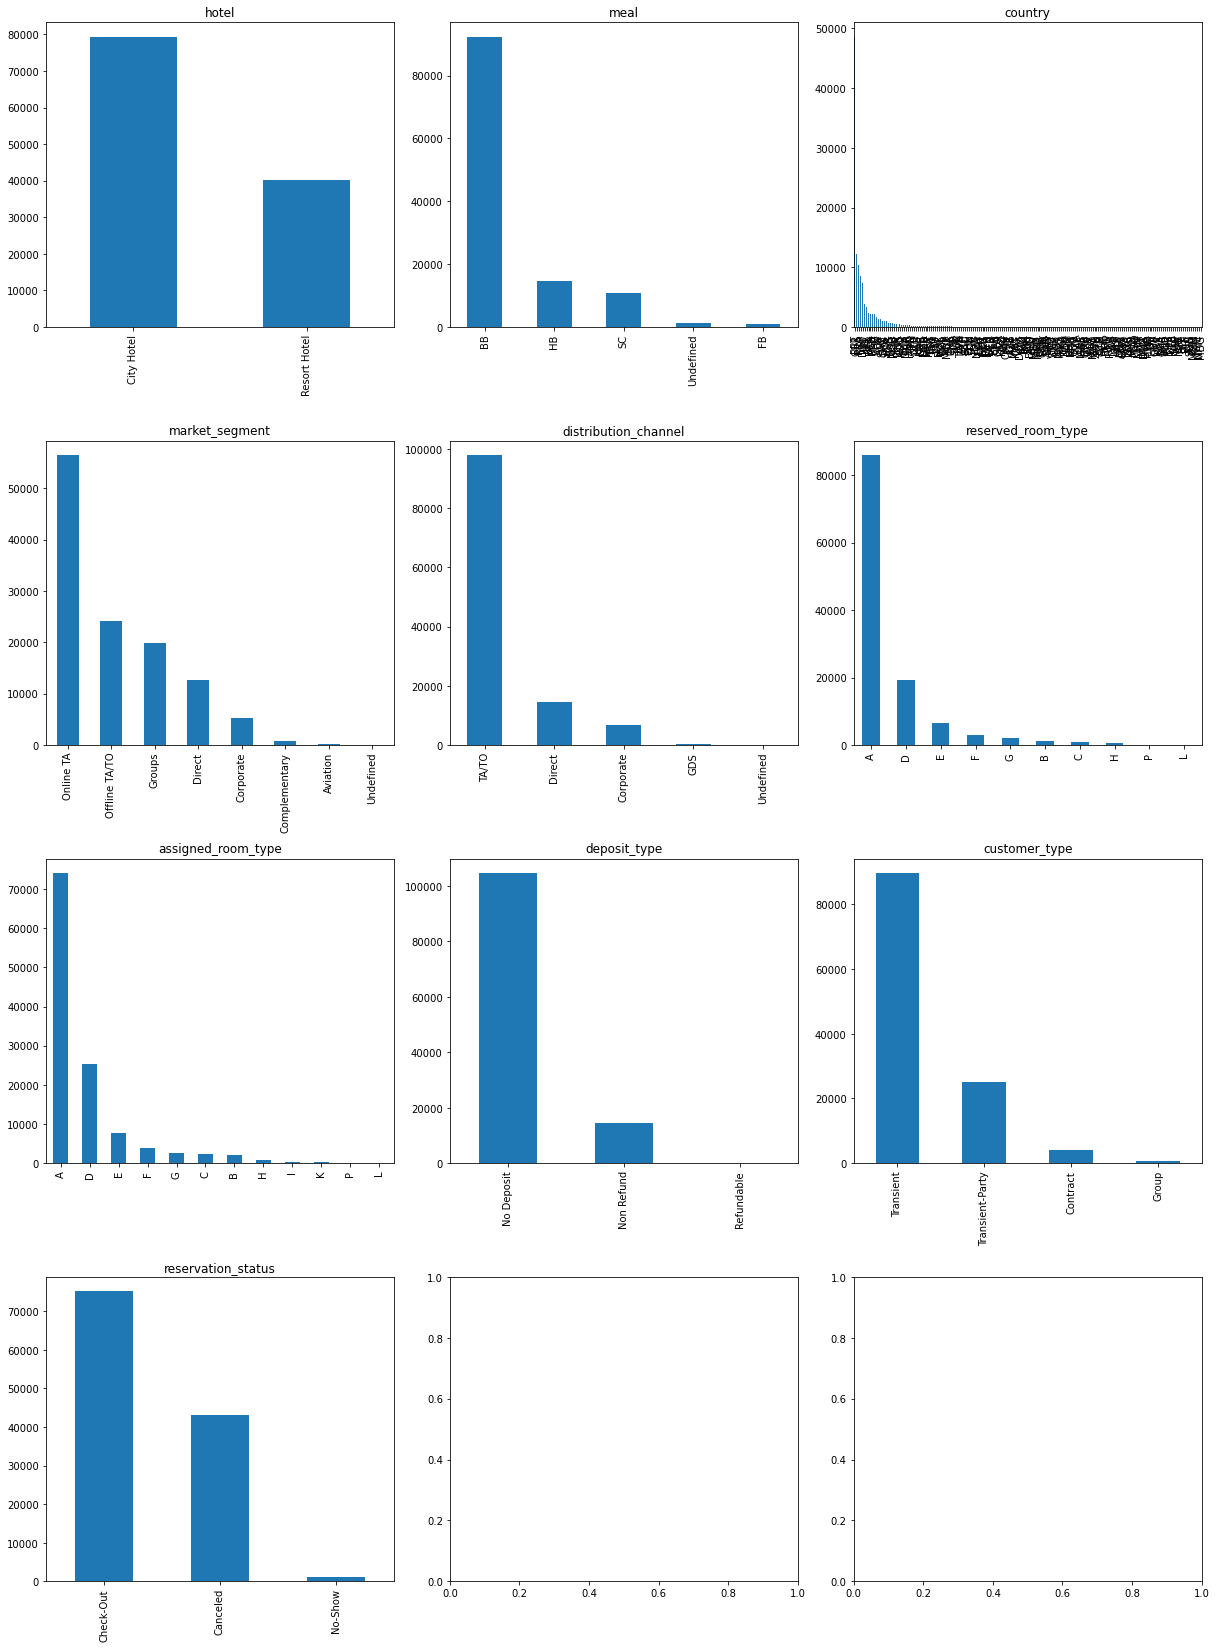

In [7]:
# Análisar variáveis categóricas
c = 3
l = -(- len(col_cat) //c)

f, axes = plt.subplots(l, c, figsize=(17,23)) 
y=0
for name in col_cat:
    i, j = divmod(y, c)
    #sns.catplot(data=df, x=name, kind='count', ax=axes[i, j])
    df[name].value_counts().plot(kind='bar',title = name, ax=axes[i, j])
    y+=1

plt.tight_layout()
plt.show()

---  
# Feature Engineering

- __Split:__ 
    - Train-test split

- __Cleaning:__
    - dropar columnas que não fazem sentido
    - remover duplicados
    - remover linhas baseado em algum critério de filtro
    - remover outliers
    - remover valores errados
    - mudar os datatypes (str, int, float)
    - marcar missings como NAN

**A etapa de limpeza dos dados deve vir antes de imputar valores missing e do one-hot-encoding**.

- __Imputing Missing Values:__ <br>
    - SimpleImputer (média, media, moda)
    - KNNImputer
    - IterativeImputer

__O Imputing deve ser feito ANTES do One-Hot-Encoding__ (tanto que ele não aceita valores nans).

- __Transform features:__ 
    - Features Categóricas: <br>
        - OrdinalEncoder <br>
        - LabelEncoder <br>
        - One-Hot-Encoding <br>
    - Features Numéricas:
        - Binarizer
        - KBinsDiscretizer
        - MinMaxScale
        - StandardScale
        - RobustScale

Os dados nans e tipos de colunas devem ter sido tratados antes desse processo.

- __Feature Engineering:__
    - PolynomialFeatures
    - PowerTransformer
    - Agregação de Features

- __Feature Selection:__
    - Univariate statistical tests
    - Recursive Feature Elimination (RFE)
    - Mutual_info_classif
    - Variance inflation factor (VIF)

In [8]:
# drop columns
# ------------------------------------------------------------------------------------------------------------------
df_clean = df.drop(columns=['reservation_status_date', 'company', 'arrival_date_week_number', 'reservation_status',
                            'arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_week_number'])

# ajustar children 
# ------------------------------------------------------------------------------------------------------------------
df_clean['children'].fillna(0, inplace=True)
df_clean['children'] = pd.to_numeric(df_clean['children'], errors='coerce')

# top5 countries
# ------------------------------------------------------------------------------------------------------------------
top5_country = list(df_clean['country'].value_counts()[:5].index)
df_clean['country'] = df_clean.country.where(df.country.isin(top5_country), 'OTHERS')

# top5 agents
# ------------------------------------------------------------------------------------------------------------------
top5_agent = list(df_clean['agent'].value_counts()[:5].index)
df_clean['agent'] = df_clean.country.where(df.country.isin(top5_agent), 'OTHERS')

df_features = df_clean.copy()

# total guests
# ------------------------------------------------------------------------------------------------------------------
df_features['total_guests'] = df_features['children'] + df_features['babies'] + df_features['adults']
df_features.drop(columns=['children', 'babies', 'adults'], inplace=True)
df_features['total_guests'] = df_features['total_guests'].apply(np.int64)

# stays_in_total
# ------------------------------------------------------------------------------------------------------------------
df_features['stayes_in_total'] = df_features["stays_in_weekend_nights"] + df_features["stays_in_week_nights"]
df_features.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'], inplace=True)

# cancellation_rate
# ------------------------------------------------------------------------------------------------------------------
df_features['cancellation_rate'] = df_features["previous_cancellations"] / (df_features["previous_cancellations"] + df_features["previous_bookings_not_canceled"])
df_features['cancellation_rate'].replace(np.nan, 0, inplace=True)
df_features.drop(columns=['previous_cancellations', 'previous_bookings_not_canceled'], inplace=True)

# assigned_as_reserved
# ------------------------------------------------------------------------------------------------------------------
df_features['assigned_as_reserved'] = (df_features["assigned_room_type"] == df_features["reserved_room_type"])*1
df_features.drop(columns=['assigned_room_type', 'reserved_room_type'], inplace=True)

In [9]:
cat_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'agent',
            'distribution_channel', 'deposit_type', 'customer_type']

num_cols = ['lead_time', 'is_repeated_guest', 'booking_changes', 'days_in_waiting_list', 'adr', 'assigned_as_reserved',
           'required_car_parking_spaces', 'total_of_special_requests', 'total_guests', 'stayes_in_total', 'cancellation_rate']

target = ['is_canceled']

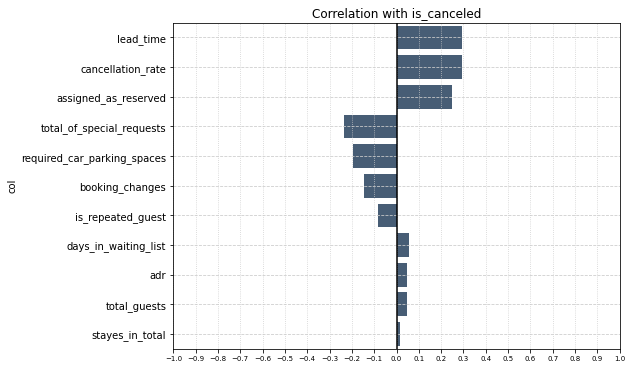

In [8]:
cor = df_features[num_cols].corrwith(df_features.is_canceled).reset_index().rename(columns={'index':'col', 0:'corr'})
cor.sort_values(by='corr', key=abs, ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(data=cor, y='col', x='corr', color='#3F5D7D').set(xlabel='')
plt.xlim([-1,1])
plt.title(f'Correlation with {target[0]}')
plt.xticks(np.arange(-1, 1.01, step=0.1), fontsize=7)
plt.grid(True, axis='y', color='#CCCCCC', linestyle='--')
plt.grid(True, axis='x', color='#CCCCCC', linestyle=':')
plt.axvline(x=0, color='k');

<AxesSubplot:>

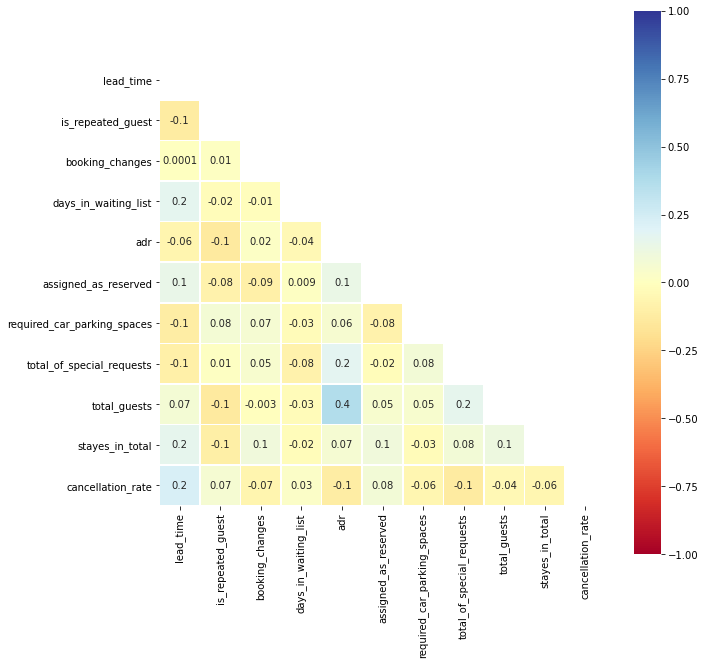

In [9]:
mask = np.triu(np.ones_like(df_features[num_cols].corr(), dtype='bool'))

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_features[num_cols].corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask)

---  
# Models

In [10]:
df = df_features.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stayes_in_total,cancellation_rate,assigned_as_reserved
0,Resort Hotel,0,342,July,BB,PRT,Direct,Direct,0,3,...,OTHERS,0,Transient,0.0,0,0,2,0,0.0,1
1,Resort Hotel,0,737,July,BB,PRT,Direct,Direct,0,4,...,OTHERS,0,Transient,0.0,0,0,2,0,0.0,1
2,Resort Hotel,0,7,July,BB,GBR,Direct,Direct,0,0,...,OTHERS,0,Transient,75.0,0,0,1,1,0.0,0
3,Resort Hotel,0,13,July,BB,GBR,Corporate,Corporate,0,0,...,OTHERS,0,Transient,75.0,0,0,1,1,0.0,1
4,Resort Hotel,0,14,July,BB,GBR,Online TA,TA/TO,0,0,...,OTHERS,0,Transient,98.0,0,1,2,2,0.0,1


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


In [13]:
from imblearn.pipeline import Pipeline as pp
from sklearn.preprocessing import MinMaxScaler

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from imblearn.over_sampling import SMOTENC

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
 from sklearn.model_selection import KFold

In [19]:
# Index of Categorical Feature
categorical_features = np.array([i for i,x in enumerate(X_train.columns) if x in cat_cols])

In [20]:
categorical_features

array([ 0,  2,  3,  4,  5,  6,  9, 10, 12])

#### Pipeline and GridSearch  LogisticRegression

In [20]:
# Criando pipeline das variáveis categóricas
cat_pipe = pp([
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'))
])

num_pipe = pp([
    ('scaler', MinMaxScaler())    
])

# Para termos no modelo tanto as variáveis categóricas quanto as numéricas
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
], remainder='passthrough')

# Criando pipeline final
pipe = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

# Tunando hiperparâmetros com 3-fold cross-validation e pipelines
penalty = ['l1', 'l2']
dual = [False]
C = [ 0.5, 1, 50] 
solver = ['liblinear']
class_weight= ['balanced', None]

parameters = {'model__penalty' : penalty,
              'model__dual' : dual , 
              'model__C': C,  
              'model__solver': solver,
              'model__class_weight' : class_weight
               }

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
#grid = GridSearchCV(pipe, param_grid=parameters, cv=kfold, scoring='f1', n_jobs=2, verbose=2)
grid = RandomizedSearchCV(pipe, param_distributions=parameters, cv=kfold, scoring='roc_auc_ovr_weighted', n_jobs=2, verbose=2)
#grid.fit(x_train[importance_pipe], y_train)

In [58]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('over',
                                              SMOTENC(categorical_features=array([ 0,  2,  3,  4,  5,  6,  9, 10, 12]),
                                                      random_state=42)),
                                             ('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                  

In [60]:
grid.best_params_

{'model__solver': 'liblinear',
 'model__penalty': 'l1',
 'model__dual': False,
 'model__class_weight': None,
 'model__C': 50}

In [61]:
best_model = grid.best_estimator_

In [62]:
y_pred = best_model.predict(X_test)

In [63]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     14907
           1       0.74      0.78      0.76      8971

    accuracy                           0.82     23878
   macro avg       0.80      0.81      0.81     23878
weighted avg       0.82      0.82      0.82     23878



#### Overfitting??

In [64]:
y_pred_train = best_model.predict(X_train)

In [65]:
clf_report = classification_report(y_train, y_pred_train)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     60259
           1       0.73      0.76      0.75     35253

    accuracy                           0.81     95512
   macro avg       0.79      0.80      0.80     95512
weighted avg       0.81      0.81      0.81     95512



### Best Score

In [81]:
best_score = LogisticRegression(solver='liblinear', penalty='l1', dual=False, C=.5)

In [82]:
pipe_best = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('best_score', best_score)
])

In [83]:
pipe_best.fit(X_train,y_train)

Pipeline(steps=[('over',
                 SMOTENC(categorical_features=array([ 0,  2,  3,  4,  5,  6,  9, 10, 12]),
                         random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'agent',
                                   

In [84]:
y_pred = pipe_best.predict(X_test)

In [85]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     14907
           1       0.75      0.78      0.76      8971

    accuracy                           0.82     23878
   macro avg       0.80      0.81      0.81     23878
weighted avg       0.82      0.82      0.82     23878



In [88]:
knn = KNN(n_neighbors=5, p=1, weights='distance')

In [92]:
pipe_best_knn = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', knn)
])

In [94]:
pipe_best_knn.fit(X_train,y_train)

Pipeline(steps=[('over',
                 SMOTENC(categorical_features=array([ 0,  2,  3,  4,  5,  6,  9, 10, 12]),
                         random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'agent',
                                   

In [95]:
y_pred = pipe_best_knn.predict(X_test)

In [96]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     14907
           1       0.79      0.84      0.82      8971

    accuracy                           0.86     23878
   macro avg       0.85      0.85      0.85     23878
weighted avg       0.86      0.86      0.86     23878



### VotingClassifier

In [118]:
# Set seed for reproducibility
SEED=42

# Instantiate lr
lr = LogisticRegression(solver='liblinear', penalty='l1', dual=False, C=.5, random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=5, p=1, weights='distance')

# Instantiate dt
dt = DecisionTreeClassifier(criterion ='gini',max_depth=11, min_samples_leaf= 6, min_samples_split = 2,random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

#### Voting hard

In [100]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

pipe_vc = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', vc)
])

# Fit vc to the training set
pipe_vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = pipe_vc.predict(X_test)



NameError: name 'accuracy_score' is not defined

In [101]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     14907
           1       0.82      0.83      0.82      8971

    accuracy                           0.87     23878
   macro avg       0.86      0.86      0.86     23878
weighted avg       0.87      0.87      0.87     23878



#### Voting soft

In [104]:
vc_soft = VotingClassifier(voting='soft', estimators=classifiers)     

pipe_vc_soft = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', vc_soft)
])

# Fit vc to the training set
pipe_vc_soft.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = pipe_vc_soft.predict(X_test)

In [105]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     14907
           1       0.82      0.84      0.83      8971

    accuracy                           0.87     23878
   macro avg       0.86      0.87      0.86     23878
weighted avg       0.87      0.87      0.87     23878



### Overfitting!

In [112]:
# Evaluate the test set predictions
y_pred = pipe_vc_soft.predict(X_train)

In [114]:
clf_report = classification_report(y_train, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     60259
           1       0.98      0.97      0.97     35253

    accuracy                           0.98     95512
   macro avg       0.98      0.98      0.98     95512
weighted avg       0.98      0.98      0.98     95512



### RandomForestClassifier

In [25]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [110]:
# Instantiate rf
rf = RandomForestClassifier(oob_score=True,
            random_state=42, class_weight='balanced', n_jobs=-1)

pipe_rf = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', rf)
])
# Fit vc to the training set
pipe_rf.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = pipe_rf.predict(X_test)


clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     14907
           1       0.84      0.84      0.84      8971

    accuracy                           0.88     23878
   macro avg       0.87      0.87      0.87     23878
weighted avg       0.88      0.88      0.88     23878



### Overfitting!

In [111]:
y_pred = pipe_rf.predict(X_train)


clf_report = classification_report(y_train, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60259
           1       0.99      0.99      0.99     35253

    accuracy                           1.00     95512
   macro avg       0.99      1.00      1.00     95512
weighted avg       1.00      1.00      1.00     95512



In [126]:
# Instantiate rf
rf = RandomForestClassifier(max_depth=11, min_samples_leaf= 6,oob_score=True,
            random_state=42, class_weight='balanced', n_jobs=-1)

pipe_rf = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', rf)
])
# Fit vc to the training set
pipe_rf.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = pipe_rf.predict(X_test)


clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14907
           1       0.81      0.78      0.79      8971

    accuracy                           0.85     23878
   macro avg       0.84      0.83      0.84     23878
weighted avg       0.85      0.85      0.85     23878



In [127]:
y_pred = pipe_rf.predict(X_train)


clf_report = classification_report(y_train, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     60259
           1       0.80      0.77      0.78     35253

    accuracy                           0.84     95512
   macro avg       0.83      0.83      0.83     95512
weighted avg       0.84      0.84      0.84     95512



In [121]:
rf.oob_score_

0.8443634975688279

 ### Best Estimator RF...

In [22]:
# Instantiate rf
rf = RandomForestClassifier(min_samples_leaf= 2,oob_score=True,
            random_state=42, class_weight='balanced', n_jobs=-1)

pipe_rf = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', rf)
])
# Fit vc to the training set
pipe_rf.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = pipe_rf.predict(X_test)


clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     14907
           1       0.84      0.84      0.84      8971

    accuracy                           0.88     23878
   macro avg       0.87      0.87      0.87     23878
weighted avg       0.88      0.88      0.88     23878



In [23]:
y_pred = pipe_rf.predict(X_train)

In [24]:
clf_report = classification_report(y_train, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     60259
           1       0.91      0.91      0.91     35253

    accuracy                           0.93     95512
   macro avg       0.93      0.93      0.93     95512
weighted avg       0.93      0.93      0.93     95512



In [25]:
rf.oob_score_

0.8860585140808842

In [26]:
rf.feature_importances_

array([1.15257180e-02, 5.29633640e-03, 3.26090308e-03, 3.99223143e-03,
       2.86142063e-03, 5.32162193e-03, 3.92346749e-03, 3.59570936e-03,
       4.33517913e-03, 3.06589355e-03, 4.36637435e-03, 4.10767363e-03,
       7.00190351e-04, 6.45125890e-03, 5.17703848e-03, 1.00938940e-03,
       5.11001875e-03, 7.18941620e-03, 8.19313318e-03, 1.00871517e-02,
       9.97668200e-02, 4.71600344e-04, 2.39233367e-03, 8.13355847e-03,
       1.82741079e-02, 2.25837022e-02, 4.18640237e-02, 6.74387069e-06,
       9.54682005e-03, 3.05832064e-04, 1.60420939e-02, 2.34768650e-05,
       1.00420302e-01, 7.69636858e-05, 2.61665326e-04, 2.64292621e-02,
       1.85776105e-02, 1.49473877e-01, 4.84897799e-03, 2.87820431e-02,
       3.07680683e-03, 8.77658653e-02, 4.66527403e-02, 3.39970929e-02,
       8.76768196e-02, 1.51849201e-02, 3.90675386e-02, 3.87262759e-02])

In [27]:
X_train.columns

Index(['hotel', 'lead_time', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_guests', 'stayes_in_total',
       'cancellation_rate', 'assigned_as_reserved'],
      dtype='object')

In [28]:
X_train[cat_cols]

,hotel,arrival_date_month,meal,country,market_segment,agent,distribution_channel,deposit_type,customer_type
67702,City Hotel,May,BB,GBR,Online TA,OTHERS,TA/TO,No Deposit,Transient
115851,City Hotel,July,BB,FRA,Direct,OTHERS,Direct,No Deposit,Transient
57345,City Hotel,September,BB,ESP,Online TA,OTHERS,TA/TO,No Deposit,Transient
11622,Resort Hotel,May,BB,FRA,Direct,OTHERS,Direct,No Deposit,Transient
33333,Resort Hotel,February,BB,GBR,Online TA,OTHERS,TA/TO,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...
76820,City Hotel,July,BB,PRT,Corporate,OTHERS,Corporate,No Deposit,Transient
110268,City Hotel,April,BB,OTHERS,Online TA,OTHERS,TA/TO,No Deposit,Transient
103694,City Hotel,December,BB,OTHERS,Offline TA/TO,OTHERS,TA/TO,No Deposit,Transient
860,Resort Hotel,August,BB,PRT,Online TA,OTHERS,TA/TO,No Deposit,Transient


In [29]:
pipe_rf['preprocessor']

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['hotel', 'arrival_date_month', 'meal',
                                  'country', 'market_segment', 'agent',
                                  'distribution_channel', 'deposit_type',
                                  'customer_type']),
                                ('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['lead_time', 'is_repeated_guest',
                                  'booking_changes', 'days_in_waiting_list',
                                  'adr', 'assigned_as_reserved',
          

In [30]:
feature_names = pipe_rf.named_steps['preprocessor'].transformers_[0][1].named_steps['ohe'].get_feature_names(['hotel', 'arrival_date_month', 'meal',
                                  'country', 'market_segment', 'agent',
                                  'distribution_channel', 'deposit_type',
                                  'customer_type'])

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
type(feature_names)

numpy.ndarray

In [32]:
X_train[num_cols].columns

Index(['lead_time', 'is_repeated_guest', 'booking_changes',
       'days_in_waiting_list', 'adr', 'assigned_as_reserved',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_guests', 'stayes_in_total', 'cancellation_rate'],
      dtype='object')

In [33]:
names_col = list(feature_names) + num_cols

In [34]:
names_col

['hotel_Resort Hotel',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_ESP',
 'country_FRA',
 'country_GBR',
 'country_OTHERS',
 'country_PRT',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'lead_time',
 'is_repeated_gues

In [52]:
df_features = pd.Series(index=names_col, data= rf.feature_importances_)
df_features_sorted = df_features.sort_values(ascending=False)

In [53]:
df_features_sorted

lead_time                         0.149474
deposit_type_Non Refund           0.100420
country_PRT                       0.099767
adr                               0.087766
total_of_special_requests         0.087677
assigned_as_reserved              0.046653
market_segment_Online TA          0.041864
stayes_in_total                   0.039068
cancellation_rate                 0.038726
required_car_parking_spaces       0.033997
booking_changes                   0.028782
customer_type_Transient           0.026429
market_segment_Offline TA/TO      0.022584
customer_type_Transient-Party     0.018578
market_segment_Groups             0.018274
distribution_channel_TA/TO        0.016042
total_guests                      0.015185
hotel_Resort Hotel                0.011526
country_OTHERS                    0.010087
distribution_channel_Direct       0.009547
country_GBR                       0.008193
market_segment_Direct             0.008134
country_FRA                       0.007189
meal_HB    

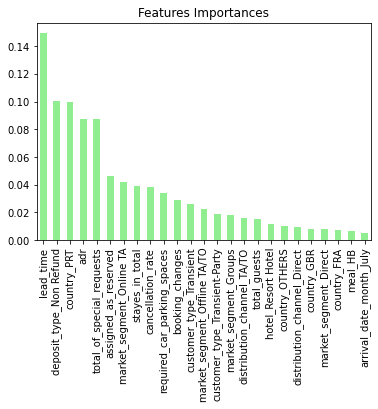

In [64]:
df_features_sorted.head(25).plot(kind='bar', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
xtc = ExtraTreesClassifier(random_state=42, n_jobs=-1)

In [67]:
pipe_xtc = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', xtc)
])
# Fit vc to the training set
pipe_xtc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = pipe_xtc.predict(X_test)


clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     14907
           1       0.83      0.84      0.83      8971

    accuracy                           0.87     23878
   macro avg       0.86      0.87      0.87     23878
weighted avg       0.87      0.87      0.87     23878



In [68]:
xtc.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [51]:
DecisionTreeClassifier(criterion ='gini',max_depth=11, min_samples_leaf= 6, min_samples_split = 2,random_state=42)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=6, random_state=42)

In [42]:
df = pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,141.984302,37.132086,1.691465,0.147865,{},0.81406,0.814304,0.811747,0.81337,0.001152,1


In [43]:
grid.best_params_

{}

In [47]:
best_model = grid.best_estimator_

In [49]:



# Obtém o best_score da validação
acc_random_search = grid.best_score_
print(f" f1 validação: {100*acc_random_search:0.1f}")

# Faz o predict no X_test
y_pred_grid = best_model.predict(X_test)

print(f" f1 teste: {100*f1_score(y_test, y_pred_grid):0.1f}")

 f1 validação: 81.3
 f1 teste: 83.4


In [ ]:
pipe_xtc = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', xtc)
])
# Fit vc to the training set
pipe_xtc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = pipe_xtc.predict(X_test)


clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

In [69]:
# Tunando hiperparâmetros com 3-fold cross-validation e pipelines
max_depth = [8, 11, 14]
bootstrap = [True, False]
min_samples_split = [ 4, 6, 9] 
min_samples_leaf = [1, 2, 3, 5]
max_features = ['sqrt', 'log2']

parameters = {'model__max_depth' : max_depth,
              'model__bootstrap' : bootstrap , 
              'model__min_samples_split': min_samples_split,  
              'model__min_samples_leaf': min_samples_leaf,
              'model__max_features' : max_features
               }

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
#grid = GridSearchCV(pipe_xtc, param_grid=parameters, cv=kfold, 
                    #scoring='f1', n_jobs=3, verbose=2, return_train_score=True )
grid = RandomizedSearchCV(pipe_xtc, param_distributions=parameters, cv=kfold, 
                          scoring='f1', n_jobs=-1, verbose=2, n_iter=30)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\imblearn\pipeline.py", line 226, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "C:\Use

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('over',
                                              SMOTENC(categorical_features=array([ 0,  2,  3,  4,  5,  6,  9, 10, 12]),
                                                      random_state=42)),
                                             ('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                  

In [ ]:
best_model = grid.best_estimator_

## XGB Classifier

In [28]:
import xgboost as xgb

In [44]:
pipe_xgb = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', xgb.XGBClassifier(booster='gbtree', use_label_encoder=False))
])

In [45]:
pipe_xgb.fit(X_train,y_train)

[18:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('over',
                 SMOTENC(categorical_features=array([ 0,  2,  3,  4,  5,  6,  9, 10, 12]),
                         random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'agent',
                                   

In [46]:
# Evaluate the test set predictions
y_pred = pipe_xgb.predict(X_test)


clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     14907
           1       0.81      0.84      0.82      8971

    accuracy                           0.87     23878
   macro avg       0.86      0.86      0.86     23878
weighted avg       0.87      0.87      0.87     23878



### VotingClassifier of all Classifiers

In [5]:
# Set seed for reproducibility
SEED=42

# Instantiate lr
lr = LogisticRegression(solver='liblinear', penalty='l1', dual=False, C=.5, random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=5, p=1, weights='distance', n_jobs=-1)

# Instantiate dt
dt = DecisionTreeClassifier(criterion ='gini',max_depth=11, 
                            min_samples_leaf= 6, min_samples_split = 2,random_state=SEED)

rf = RandomForestClassifier(min_samples_leaf= 2,oob_score=True,
            random_state=42, class_weight='balanced', n_jobs=-1)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt), ('Random Forest', rf )]

NameError: name 'LogisticRegression' is not defined

In [23]:
vc_soft = VotingClassifier(voting='soft', estimators=classifiers, n_jobs=-1)     

pipe_vc_soft = pp([
    ('over', SMOTENC(random_state=42, categorical_features=categorical_features)),
    ('preprocessor', preprocessor),
    ('model', vc_soft)
])

# Fit vc to the training set
pipe_vc_soft.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = pipe_vc_soft.predict(X_test)

In [24]:
clf_report = classification_report(y_test, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     14907
           1       0.83      0.84      0.83      8971

    accuracy                           0.87     23878
   macro avg       0.87      0.87      0.87     23878
weighted avg       0.88      0.87      0.88     23878



### Overfitting

In [25]:
y_pred = pipe_vc_soft.predict(X_train)

In [26]:
clf_report = classification_report(y_train, y_pred)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     60259
           1       0.93      0.94      0.94     35253

    accuracy                           0.95     95512
   macro avg       0.95      0.95      0.95     95512
weighted avg       0.95      0.95      0.95     95512

